#### Note on Limb-Darkening coefficients (LDC):

- Use the parameters nl1 and nl2 for quadratic limb-darkening coefficients based on *Mandel & Agol (2002)*.
- Use nl3 and nl4 for quadratic limb-darkening but with coefficients q1 and q2 from *Kipping (2013)*.
- Use nl1, nl2, nl3 and nl4 for non-linear limb-darkening. This uses the small planet approximation from *Mandel & Agol (2002)*.

Set unused parameters at 0

### Simple example to generate a transit light curve

In [11]:
import transitmodel as tm
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18

In [12]:
# Start by initializing the parameters
sol = tm.transit_model_class()

# System parameters
sol.rho = 1.0    # Mean stellar density (g/cm^3)
sol.nl1 = 0.0    # LDC - Only used for non-linear limb-darkening
sol.nl2 = 0.0    # LDC - Only used for non-linear limb-darkening
sol.nl3 = 0.3    # LDC - q1
sol.nl4 = 0.4    # LDC - q2
sol.dil = 0.0    # Dilution
sol.vof = 0.0    # Velocity offset
sol.zpt = 0.0    # Photometric zero point
sol.npl = 1      # Number of planets

# Planet parameters
sol.t0  = 1.0    # Center of transit time (days)
sol.per = 2.0    # Orbital period (days)
sol.bb  = 0.5    # Impact parameter (NOT the square of b)
sol.rdr = 0.1    # Rp/R*
sol.ecw = 0.0    # sqrt(e)cos(w)
sol.esw = 0.0    # sqrt(e)sin(w)
sol.krv = 0.0    # RV amplitude (m/s)
sol.ted = 0.0    # Thermal eclipse depth (ppm)
sol.ell = 0.0    # Ellipsodial variations (ppm)
sol.alb = 0.0    # Albedo amplitude (ppm)

# Generate time array
t = np.linspace(0, 6, int(1e4))

In [ ]:
# Generate the light curve
# The first time running this can take a couple of seconds because numba has to compile the function

# To use supersampling, set nintg to an integer greater than 1 and set itime to the integration time

flux = tm.transitModel(sol, t, nintg=1)

Text(0, 0.5, 'Normalized flux')

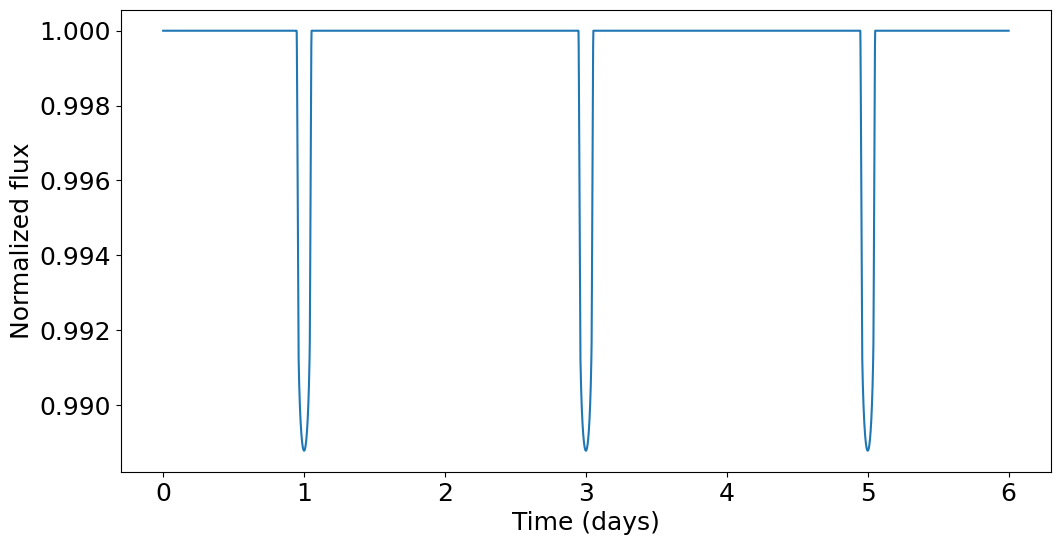

In [ ]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(t, flux)
plt.xlabel("Time (days)")
plt.ylabel("Normalized flux")

### Multiplanets example

In [26]:
# Start by initializing the parameters
sol = tm.transit_model_class()

# System parameters
sol.rho = 1.0      # Mean stellar density (g/cm^3)
sol.nl1 = 0.0      # LDC - Only used for non-linear limb-darkening
sol.nl2 = 0.0      # LDC - Only used for non-linear limb-darkening
sol.nl3 = 0.3      # LDC - q1
sol.nl4 = 0.4      # LDC - q2
sol.dil = 0.0      # Dilution
sol.vof = 0.0      # Velocity offset
sol.zpt = 0.0      # Photometric zero point
sol.npl = 2        # Number of planets (Don't forget to set this to 2 (or more))

# Planet parameters. Takes arrays the length of sol.npl as inputs
sol.t0  = [1.0, 0.5]     # Center of transit time (days)
sol.per = [2.0, 3.0]     # Orbital period (days)
sol.bb  = [0.5, 0.9]    # Impact parameter (NOT the square of b)
sol.rdr = [0.1, 0.1]     # Rp/R*
sol.ecw = [0.0, 0.0]     # sqrt(e)cos(w)
sol.esw = [0.0, 0.0]     # sqrt(e)sin(w)
sol.krv = [0.0, 0.0]     # RV amplitude (m/s)
sol.ted = [0.0, 0.0]     # Thermal eclipse depth (ppm)
sol.ell = [0.0, 0.0]     # Ellipsodial variations (ppm)
sol.alb = [0.0, 0.0]     # Albedo amplitude (ppm)

# Generate time array
t = np.linspace(0, 6.6, int(1e4))

In [27]:
# Generate the light curve
flux = tm.transitModel(sol, t, nintg=1)

Text(0, 0.5, 'Normalized flux')

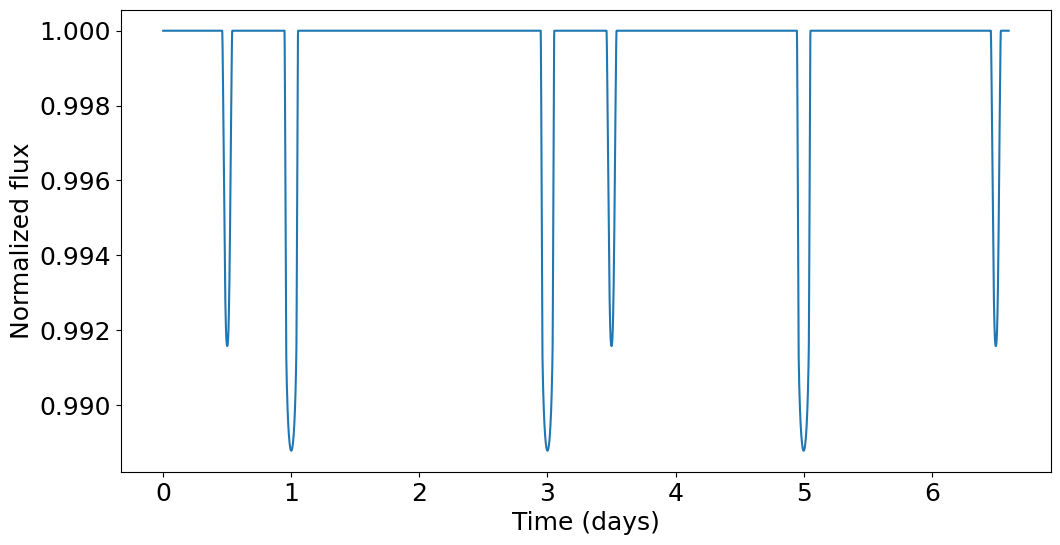

In [28]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(t, flux)
plt.xlabel("Time (days)")
plt.ylabel("Normalized flux")